In [119]:
import pandas as pd

# Carregar o arquivo "Dados_Trabalho_TP2.csv"
df = pd.read_csv("Dados_Trabalho_TP2.csv")

# Verificar a dimensão do dataframe
dimensoes = df.shape
print("Dimensão do dataframe:", dimensoes)

# Obter um resumo dos dados
sumario = df.describe()
print("Resumo dos dados:")
print(sumario)

Dimensão do dataframe: (2111, 18)
Sumário dos dados:
       Unnamed: 0        Idade       Altura         Peso          FCV  \
count  2111.00000  2111.000000  2111.000000  2111.000000  2111.000000   
mean   1055.00000    24.312600     1.701677    86.586058     2.419043   
std     609.53753     6.345968     0.093305    26.191172     0.533927   
min       0.00000    14.000000     1.450000    39.000000     1.000000   
25%     527.50000    19.947192     1.630000    65.473343     2.000000   
50%    1055.00000    22.777890     1.700499    83.000000     2.385502   
75%    1582.50000    26.000000     1.768464   107.430682     3.000000   
max    2110.00000    61.000000     1.980000   173.000000     3.000000   

               NRP           CA          FAF         TUDE  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.685628     2.008011     1.010298     0.657866  
std       0.778039     0.612953     0.850592     0.608927  
min       1.000000     1.000000     0.000000     

In [120]:
df['IMC'] = df['Peso'] / (df['Altura'] ** 2)

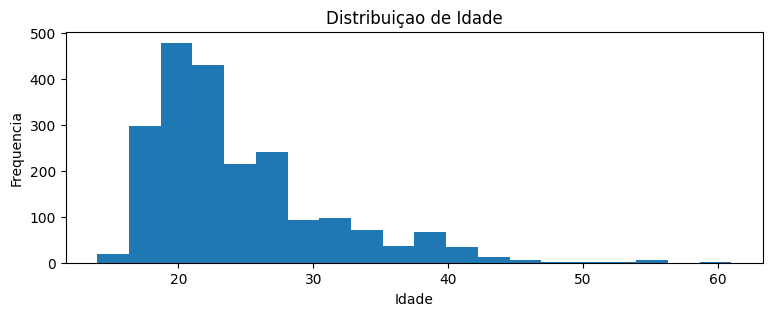

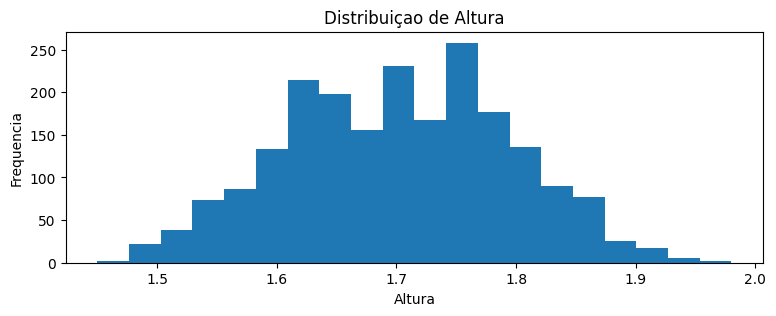

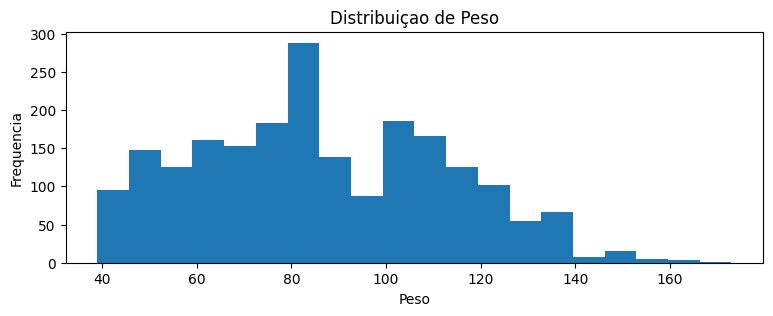

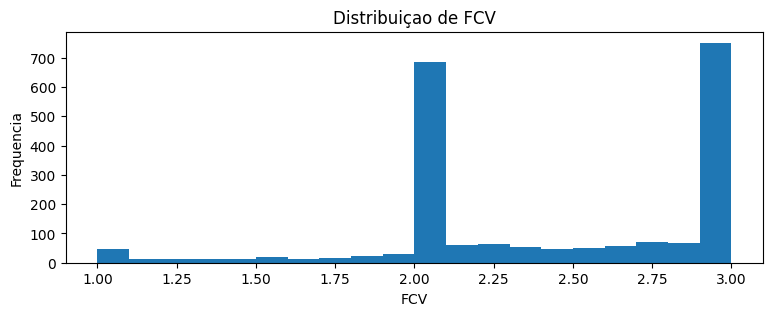

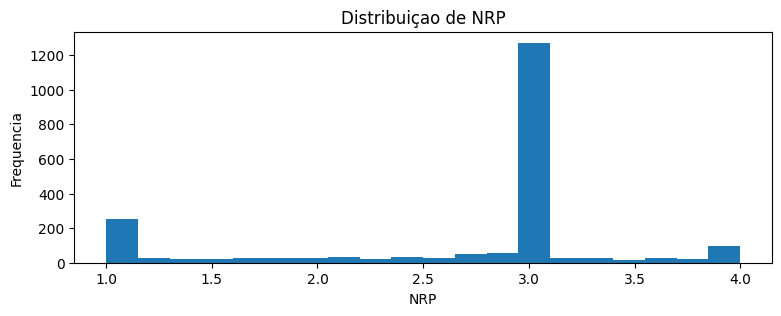

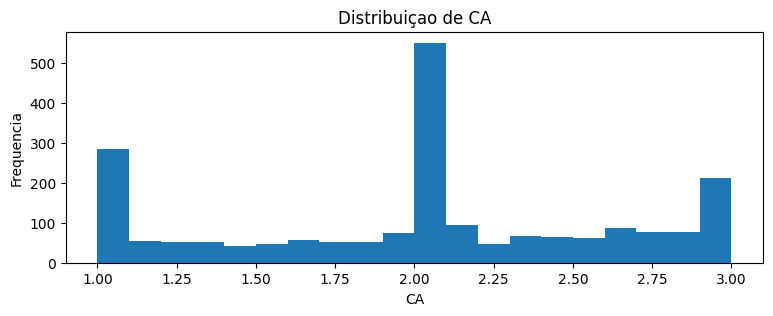

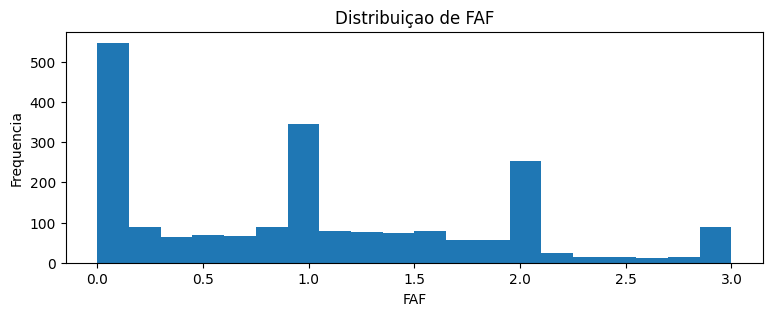

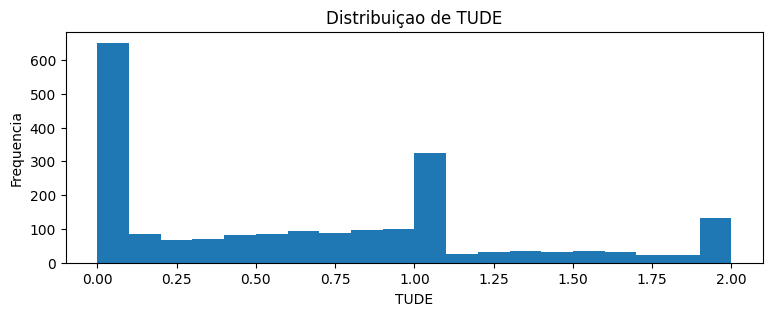

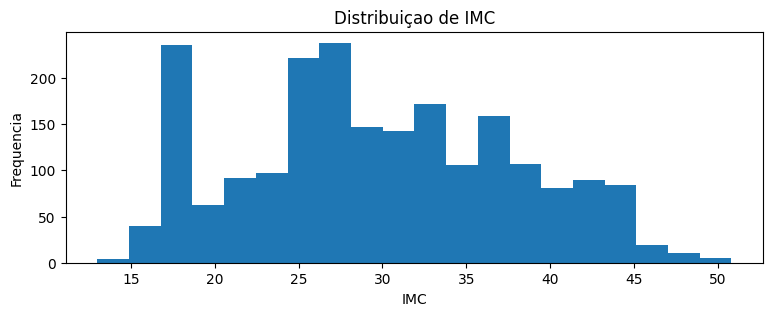

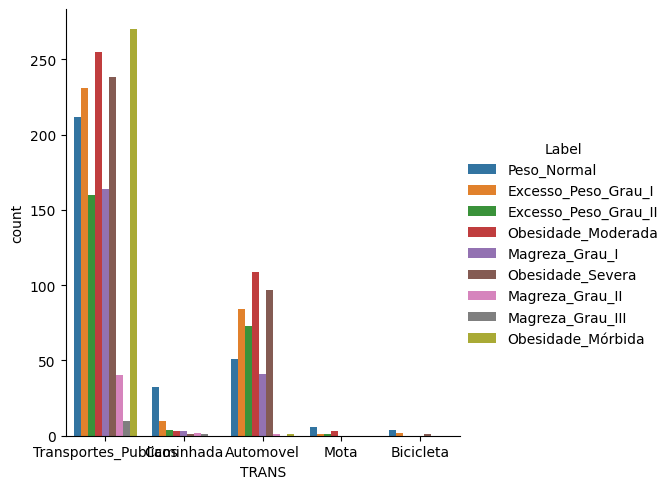

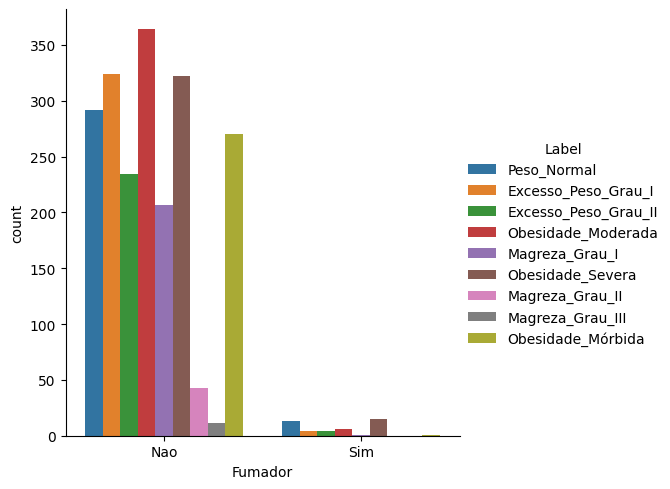

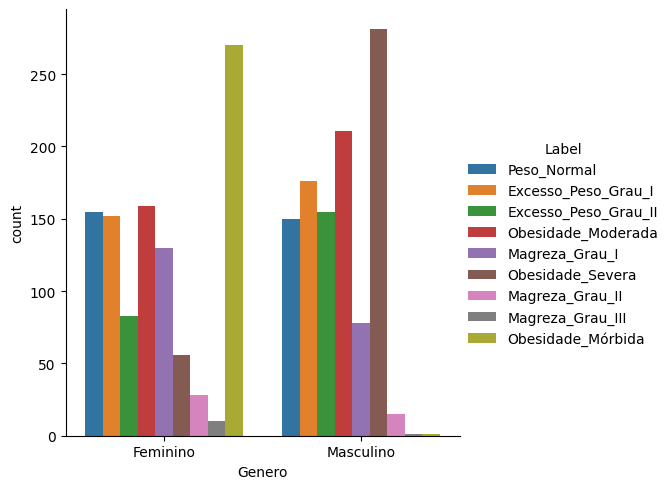

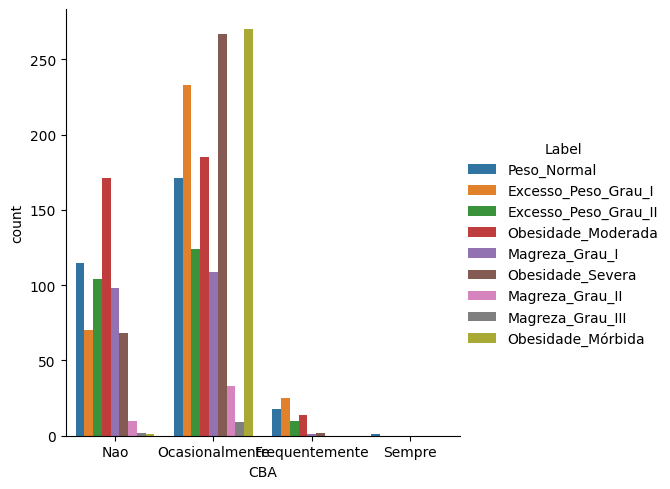

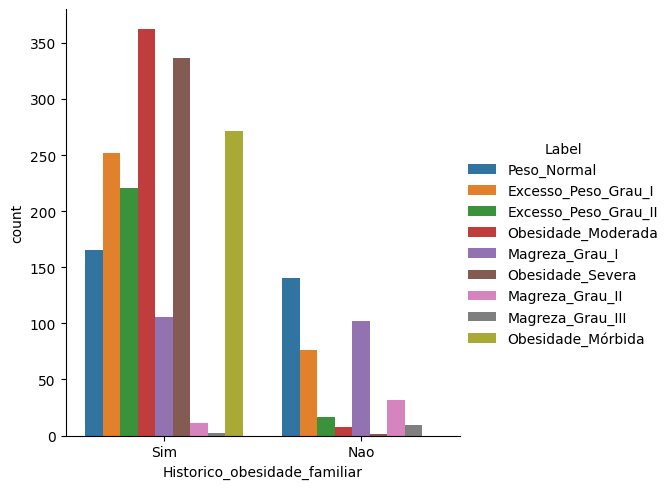

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_attributes = ['Idade', 'Altura', 'Peso', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']

for attribute in numerical_attributes:
    plt.figure(figsize=(9, 3))
    plt.hist(df[attribute], bins=20)
    plt.xlabel(attribute)
    plt.ylabel('Frequencia')
    plt.title(f'Distribuiçao de {attribute}')
    plt.show()

non_numerical_columns = ['TRANS', 'Fumador', 'Genero','CBA','Historico_obesidade_familiar']

for column in non_numerical_columns:
    # Criar o gráfico de relação
    sns.catplot(x=column, hue="Label", kind="count", data=df)



<Axes: xlabel='IMC', ylabel='Count'>

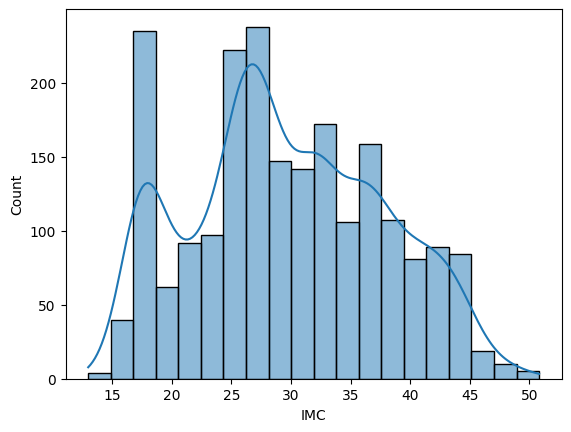

In [122]:
sns.histplot(df['IMC'], bins=20, kde=True)

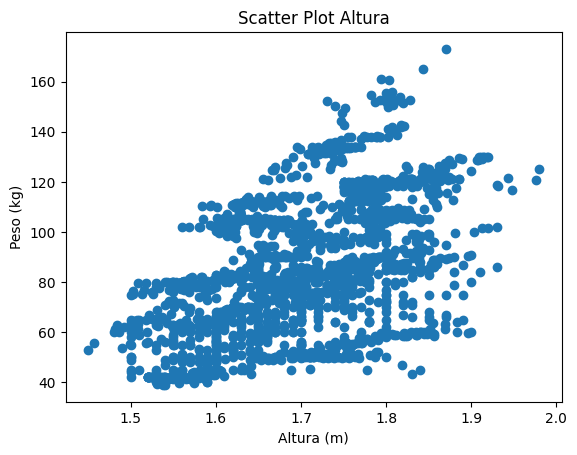

In [123]:
plt.scatter(df['Altura'], df['Peso'])
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Scatter Plot Altura')
plt.show()

In [124]:
# Identificar missing values
missing_values = df.isna().sum()

print("Missing values:")
print(missing_values)

# Limpar os dados removendo as linhas com missing values
df_cleaned = df.dropna()

print("Cleaned dataset:")
print(df_cleaned)

Missing values:
Unnamed: 0                      0
Genero                          0
Idade                           0
Altura                          0
Peso                            0
Historico_obesidade_familiar    0
FCCAC                           0
FCV                             0
NRP                             0
CCER                            0
Fumador                         0
CA                              0
MCC                             0
FAF                             0
TUDE                            0
CBA                             0
TRANS                           0
Label                           0
IMC                             0
dtype: int64
Cleaned dataset:
      Unnamed: 0     Genero      Idade    Altura        Peso  \
0              0   Feminino  21.000000  1.620000   64.000000   
1              1   Feminino  21.000000  1.520000   56.000000   
2              2  Masculino  23.000000  1.800000   77.000000   
3              3  Masculino  27.000000  1.800000   8

In [125]:
import numpy as np
from scipy import stats

# Calculalar os z-scores para os atributos numéricos
z_scores = np.abs(stats.zscore(df[numerical_attributes]))

# Definir um threshold para identificar outliers baseado em que toda a data esteja dentro de 3 desvios padrão normalmente
threshold = 3

# Encontrar os índices dos outliers
outlier_indices = np.where(z_scores > threshold)

print("Indices of outliers:")
print(outlier_indices)

Indices of outliers:
(array([  21,   92,  133,  137,  161,  169,  232,  252,  344,  492, 1013,
       1034, 1063, 1088, 1101, 1158, 1179, 1208, 1215, 1267, 1286, 1305,
       1386, 1387, 1490], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64))


In [126]:
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['Idade', 'Altura', 'Peso', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Normalizar os atributos numéricos
df[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])

C:\Users\guilh\AppData\Local\Temp\ipykernel_8532\1550957438.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(columns=['Unnamed: 0']).corr()


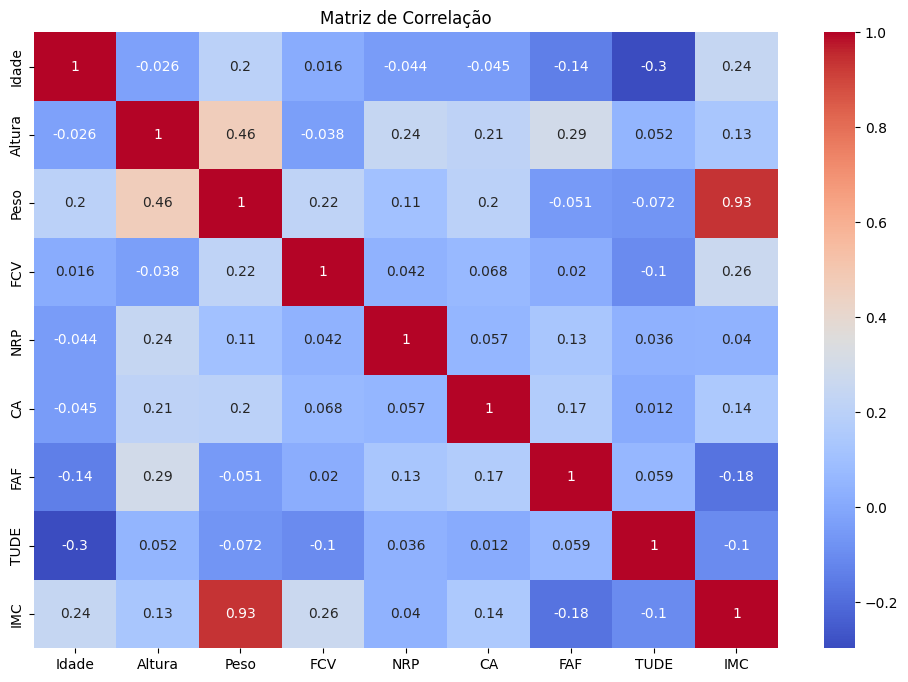

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.drop(columns=['Unnamed: 0']).corr()

# Plotar o diagrama de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Linear function: IMC = 0.30 * Idade + 22.48


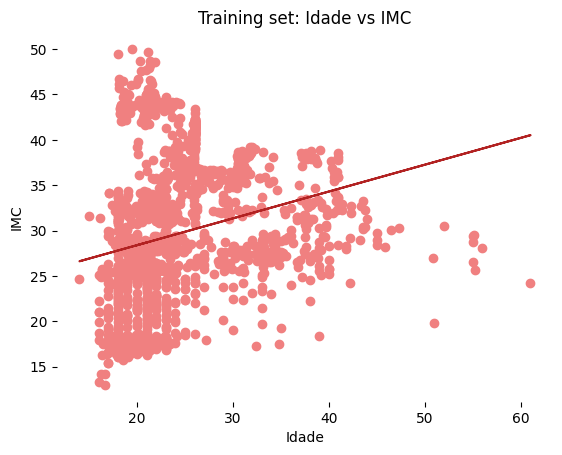

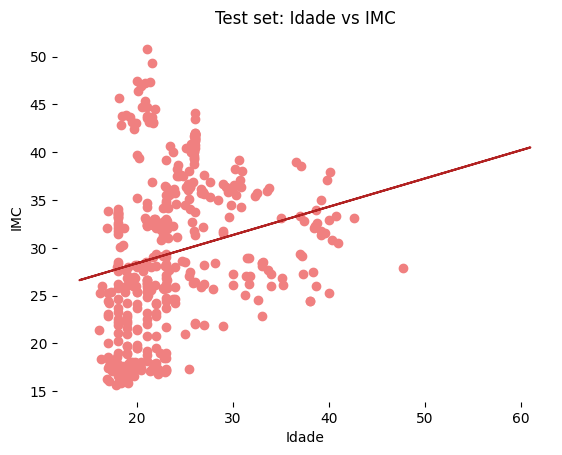

MAE: 6.5485
RMSE: 7.8499
Intercept: [22.48319198]
Coefficient: [[0.29551479]]


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Dividir o conjunto de dados em treino e teste
X = df_cleaned['Idade'].values.reshape(-1, 1)
y = df_cleaned['IMC'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model.fit(X_train, y_train)

slope = model.coef_[0][0]

# Imprimir a equação da reta

print(f"Linear function: IMC = {slope:.2f} * Idade + {model.intercept_[0]:.2f}")

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)
y_predtrain = model.predict(X_train)

# Plotar o modelo 
plt.scatter(X_train, y_train, color='lightcoral')
plt.plot(X_train, y_predtrain, color='firebrick')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.title('Training set: Idade vs IMC')
plt.box(False)
plt.show()

plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, y_predtrain, color='firebrick')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.title('Test set: Idade vs IMC')
plt.box(False)
plt.show()

# Calcular o MAE e o RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE: {:.4f}". format(mae))
print("RMSE: {:.4f}".format(rmse))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Linear function: IMC = 0.29 * Peso + 4.96


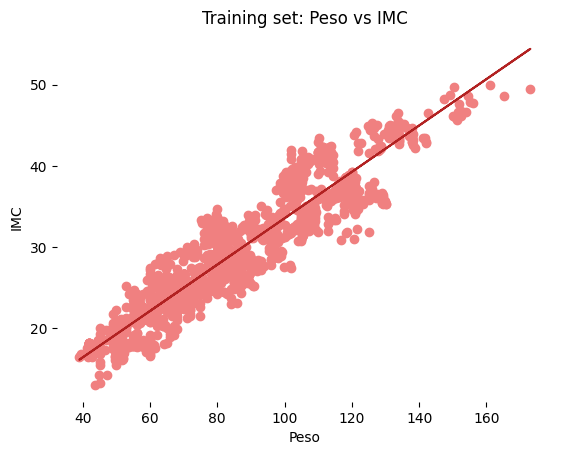

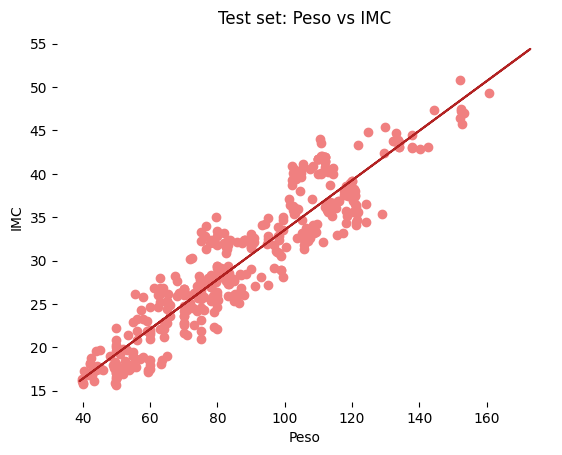

MAE: 2.3185
RMSE: 2.8697
Intercept: [4.95613407]
Coefficient: [[0.28582689]]


In [129]:
# Dividir o conjunto de dados em treino e teste
X = df_cleaned['Peso'].values.reshape(-1, 1)
y = df_cleaned['IMC'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model.fit(X_train, y_train)

slope = model.coef_[0][0]

# Imprimir a equação da reta

print(f"Linear function: IMC = {slope:.2f} * Peso + {model.intercept_[0]:.2f}")

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)
y_predtrain = model.predict(X_train)

# Plotar o modelo 
plt.scatter(X_train, y_train, color='lightcoral')
plt.plot(X_train, y_predtrain, color='firebrick')
plt.xlabel('Peso')
plt.ylabel('IMC')
plt.title('Training set: Peso vs IMC')
plt.box(False)
plt.show()

plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, y_predtrain, color='firebrick')
plt.xlabel('Peso')
plt.ylabel('IMC')
plt.title('Test set: Peso vs IMC')
plt.box(False)
plt.show()

# Calcular o MAE e o RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE: {:.4f}". format(mae))
print("RMSE: {:.4f}".format(rmse))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)